In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [105]:
smolimg = cv2.imread('20210612_13_46_18_000_1sLQQulUcKc9QeR6Y5rRGuwPYU62_F_3264_2448.jpg')

smolimg = cv2.resize(smolimg,(800,600))
plt.imshow(smolimg)

(array([[[1914, 1068]],

       [[1913, 1069]],

       [[1913, 1077]],

       [[1914, 1077]],

       [[1915, 1078]],

       [[1918, 1078]],

       [[1919, 1077]],

       [[1919, 1069]],

       [[1919, 1075]],

       [[1918, 1076]],

       [[1916, 1076]],

       [[1915, 1075]],

       [[1915, 1069]]], dtype=int32), array([[[567, 859]],

       [[566, 860]],

       [[566, 870]],

       [[563, 873]],

       [[564, 874]],

       [[564, 875]],

       [[566, 877]],

       [[568, 875]],

       [[568, 868]],

       [[569, 867]],

       [[570, 867]],

       [[573, 870]],

       [[573, 871]],

       [[574, 872]],

       [[574, 873]],

       [[575, 874]],

       [[576, 874]],

       [[577, 873]],

       [[577, 872]],

       [[575, 870]],

       [[575, 869]],

       [[574, 868]],

       [[576, 866]],

       [[576, 865]],

       [[577, 864]],

       [[577, 862]],

       [[575, 860]],

       [[574, 860]],

       [[573, 859]]], dtype=int32), array([[[568, 862]],


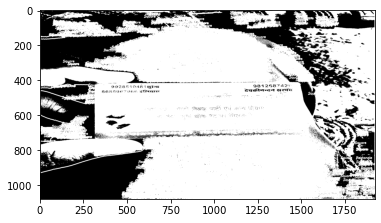

In [69]:
gray_img = cv2.cvtColor(smolimg, cv2.COLOR_BGR2GRAY)
thresh_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

cnts = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
max = 0
print(cnts)
for cnt in cnts:    
    
    approx = cv2.contourArea(cnt)
    if approx > max:
        max = approx
        maxcnt = cnt    
    # print(approx)

print(max)    

# plt.imshow( smolimg, cmap='gray')
plt.imshow(thresh_img, cmap='gray')
# cv2.waitKey()

In [92]:
gray = cv2.cvtColor(smolimg, cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(gray,50,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
print("Number of contours detected:", len(contours))

for cnt in contours:
   
   x1,y1 = cnt[0][0]
   # area = cv2.contourArea(cnt[0][0])
   approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
   if len(approx) == 4:
      arr = []
      x, y, w, h = cv2.boundingRect(cnt)
      area = w*h
      arr.append(x1)
      arr.append(x)
      arr.append(y1)
      arr.append(y)
      arr.append(w)
      arr.append(h)
      
      ratio = float(w)/h
      arr.append(ratio)
      arr.append(area)
      print(arr)
      print(cnt)
      if ratio >= 0.9 and ratio <= 1.1:
         smolimg = cv2.drawContours(smolimg, [cnt], -1, (0,255,255), 3)
         cv2.putText(smolimg, 'Square', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)
      else:
         cv2.putText(gray, 'Rectangle', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1000, (0, 255, 0), 2)
         gray = cv2.drawContours(smolimg, [cnt], -1, (0,255,0), 3)
         # cv2.rectangle(gray,(x1,y1),(x+w,y+h),(255,0,0),3)


# plt.imshow( gray, cmap=plt.get_cmap('gray'))


Number of contours detected: 11641
[629, 629, 598, 597, 3, 3, 1.0, 9]
[[[629 598]]

 [[630 597]]

 [[631 598]]

 [[630 599]]]
[537, 537, 598, 597, 3, 3, 1.0, 9]
[[[537 598]]

 [[538 597]]

 [[539 598]]

 [[538 599]]]
[516, 516, 598, 597, 3, 3, 1.0, 9]
[[[516 598]]

 [[517 597]]

 [[518 598]]

 [[517 599]]]
[456, 456, 598, 597, 3, 3, 1.0, 9]
[[[456 598]]

 [[457 597]]

 [[458 598]]

 [[457 599]]]
[422, 422, 598, 597, 3, 3, 1.0, 9]
[[[422 598]]

 [[423 597]]

 [[424 598]]

 [[423 599]]]
[398, 398, 598, 597, 3, 3, 1.0, 9]
[[[398 598]]

 [[399 597]]

 [[400 598]]

 [[399 599]]]
[394, 394, 598, 597, 3, 3, 1.0, 9]
[[[394 598]]

 [[395 597]]

 [[396 598]]

 [[395 599]]]
[374, 374, 598, 597, 3, 3, 1.0, 9]
[[[374 598]]

 [[375 597]]

 [[376 598]]

 [[375 599]]]
[765, 765, 597, 596, 3, 3, 1.0, 9]
[[[765 597]]

 [[766 596]]

 [[767 597]]

 [[766 598]]]
[600, 600, 597, 596, 3, 3, 1.0, 9]
[[[600 597]]

 [[601 596]]

 [[602 597]]

 [[601 598]]]
[562, 562, 597, 596, 3, 3, 1.0, 9]
[[[562 597]]

 [[563

Number of contours:9131


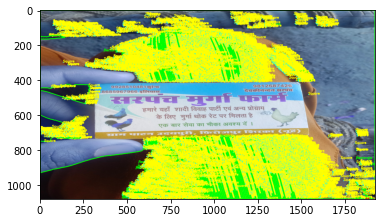

In [77]:
import cv2 
# image= cv2.imread("21.png")
plt.imshow(smolimg)
gray=cv2.cvtColor(smolimg, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap=plt.get_cmap('gray'))
ret,binary= cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy= cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
print("Number of contours:" + str(len(contours)))
x,y,w,h= cv2.boundingRect(contours[0])
cv2.rectangle(smolimg,(x,y),(x+w,y+h),(255,0,0),3)
plt.imshow(smolimg)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

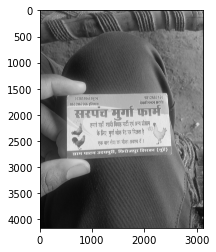

In [95]:
ig = cv2.imread('20210613_11_03_31_000_0jKd39aZFrUJQhjwr4kWJ5lPMMF3_F_4160_3120.jpg')
gray = cv2.cvtColor(ig, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap=plt.get_cmap('gray'))

In [113]:
smolimg = cv2.imread('20210612_13_46_18_000_1sLQQulUcKc9QeR6Y5rRGuwPYU62_F_3264_2448.jpg')

smolimg = cv2.resize(smolimg,(800,600))

imgGry = cv2.cvtColor(smolimg, cv2.COLOR_BGR2GRAY)

ret , thrash = cv2.threshold(imgGry, 240 , 255, cv2.CHAIN_APPROX_NONE)
contours , hierarchy = cv2.findContours(thrash, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)



for contour in contours:
    approx = cv2.approxPolyDP(contour, 1* cv2.arcLength(contour, True), True)
    cv2.drawContours(smolimg, [approx], 0, (0, 0, 0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1] - 5
    if len(approx) == 3:
        cv2.putText( smolimg, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0) )
    elif len(approx) == 4 :
        x, y , w, h = cv2.boundingRect(approx)
        aspectRatio = float(w)/h
        print(aspectRatio)
        if aspectRatio >= 0.95 and aspectRatio < 1.05:
            cv2.putText(smolimg, "square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

        else:
            cv2.putText(smolimg, "rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

    elif len(approx) == 5 :
        cv2.putText(smolimg, "pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    elif len(approx) == 10 :
        cv2.putText(smolimg, "star", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    else:
        cv2.putText(smolimg, "circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

cv2.imshow('shapes', smolimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

127 251 363 222
19 209 189 116
0 0 490 276


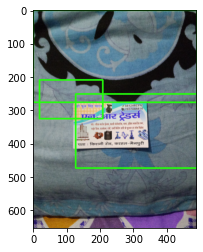

In [73]:
image = cv2.imread('20210610_06_36_31_000_1sLQQulUcKc9QeR6Y5rRGuwPYU62_F_3264_2448.jpg')
image = cv2.resize(image, (490, 653))
# print(image.shape)
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)



gray_img = cv2.erode(gray_img, None, iterations=1)
gray_img = cv2.dilate(gray_img, None, iterations=1)

gray_img = cv2.equalizeHist(gray_img)
blur = cv2.GaussianBlur(image,(5,5),0)

#Block size must be odd and greater than 1 and can be used to control the size of blocks used in the adaptive thresholding
thresh_img = cv2.adaptiveThreshold(gray_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,107,9)

cnts = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
newcnt=[]

# areathreshold can be changed to filter out small contours
area_threshold = 1000
maxcnt = 0
for cnt in cnts:
    if cv2.contourArea(cnt) > area_threshold:

        x,y,w,h = cv2.boundingRect(cnt)
        if w != h and  w/h < 2 and h/w < 2:

        # if maxcnt < cv2.contourArea(cnt):
        #     maxcnt = cv2.contourArea(cnt)
        #     newcnt = cnt
                
            
        
            print(x,y,w,h)
            cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 3)


resize = image
plt.imshow( resize)
# cv2.waitKey()


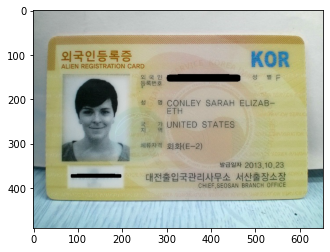

In [6]:
plt.imshow(image)

In [7]:
blur = cv2.GaussianBlur(image,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(th3)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1555: error: (-2:Unspecified error) in function 'double __cdecl cv::threshold(const class cv::_InputArray &,const class cv::_OutputArray &,double,double,int)'
> THRESH_OTSU mode:
>     'src_type == CV_8UC1 || src_type == CV_16UC1'
> where
>     'src_type' is 16 (CV_8UC3)


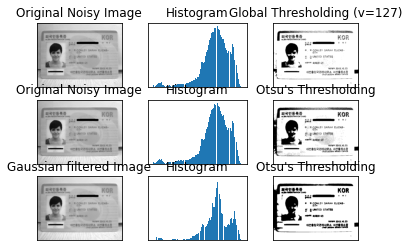

In [8]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('UvlWm.jpg',0)
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])